In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Inverse Sampling

**Problem** Given a random variable $X$ with a cumulative distribution function (CDF) $F_X$, generate (possibly many) values so that they are distributed accordingly.

**Method**

Repeat as many times as the number of values you need:

1. Sample $u$ from $U \sim \text{Uniform}([0, 1])$;
2. Compute $z = F_X^{-1}(u)$, this will be our desired value.

Here, $F_X^{-1}$ is the inverse function of the CDF $F_X$.


In [13]:
def inverse_sampling(cdf_inv, N=1):
    if N == 1:
        u = np.random.rand()
    else:
        u = np.random.rand(N)
        
    x = cdf_inv(u)
    return x

**Proof of correctness**

We shall prove that the random variable $Z = F_X^{-1}(U)$ does have $F_X$ as its CDF.

$$
    P(Z \leq z) = P(F_X^{-1}(U) \leq z) = P(U \leq F_X(z)) = F_U(F_X(z)) = F_X(z).
$$

The second equality comes from the fact that $F_X$ is an increasing function. The last equality is the property of the uniform distribution on $[0, 1]$.

# Example

A random variable $X$ follows the **exponential distribution**. The CDF of $X$ is 
$$
    F(x; \lambda) = P(X \leq x; \lambda) = 1 - e^{-\lambda x}, \forall x \geq 0.
$$

Its PDF is
$$
    f(x; \lambda) = F'(x; \lambda) = \lambda e^{-\lambda x}, \forall x \geq 0.
$$

In [14]:
def exp_cdf(x, _lambda):
    return 1 - np.exp(-_lambda * x)

def exp_pdf(x, _lambda):
    return _lambda * np.exp(-_lambda * x)

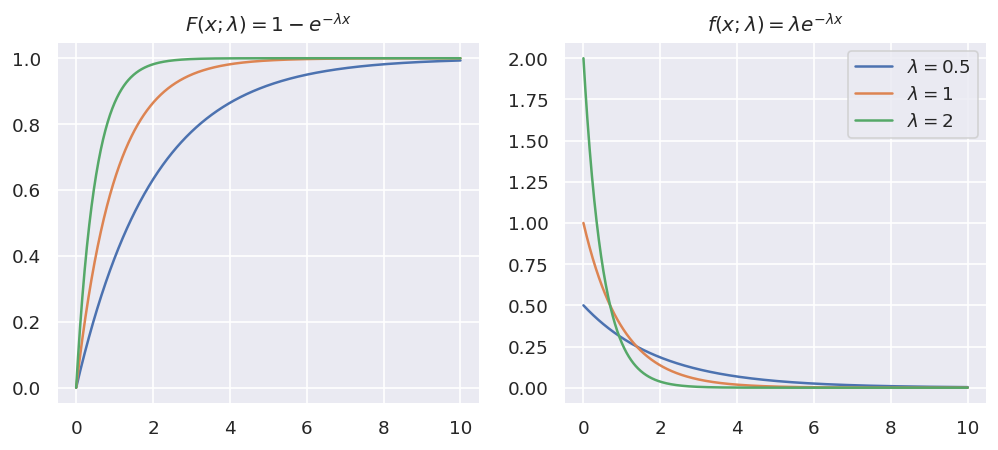

In [15]:
_lambdas = [0.5, 1, 2]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
x = np.linspace(start=0, stop=10, num=1000)
for _lambda in _lambdas:
    F = exp_cdf(x, _lambda)
    f = exp_pdf(x, _lambda)

    ax[0].plot(x, F, label=f'$\lambda = {_lambda}$')
    ax[0].set_title('$F(x; \lambda) = 1 - e^{-\lambda x}$')

    ax[1].plot(x, f, label=f'$\lambda = {_lambda}$')
    ax[1].set_title('$f(x; \lambda) = \lambda e^{-\lambda x}$')
plt.legend()
plt.show()

The inverse of the CDF of $X$ is
$$
    F_X^{-1}(y; \lambda) = - \frac{1}{\lambda} \ln (1 - y), \forall y \in (0, 1).
$$

In [16]:
def exp_cdf_inv(y, _lambda):
    return - np.log(1 - y) / _lambda

We sample $N$ values of $X$ using the inverse sampling method.

In [17]:
_lambda = 2
N = 5000

exp_cdf_inv_lambda = lambda y: exp_cdf_inv(y, _lambda)
X = inverse_sampling(exp_cdf_inv_lambda, N)

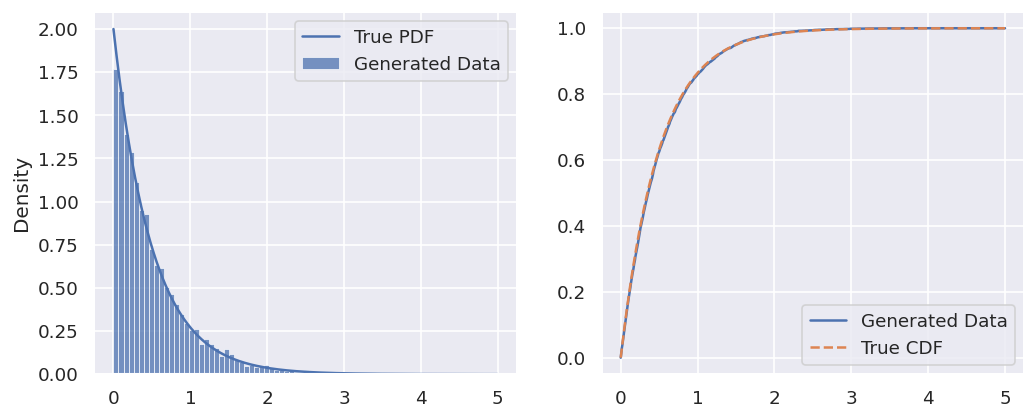

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

sns.histplot(X, stat='density', ax=ax[0], label='Generated Data')

# True PDF f(x)
x = np.linspace(start=0, stop=5, num=1000)
f = exp_pdf(x, _lambda)
ax[0].plot(x, f, label='True PDF')
ax[0].legend()

x = np.linspace(start=0, stop=5, num=1000)

# Generated data P(X <= x)
cdf = np.count_nonzero(np.expand_dims(X, 1) <= x, 0) / N
ax[1].plot(x, cdf, label='Generated Data')

# True CDF F(x)
F = exp_cdf(x, _lambda)
ax[1].plot(x, F, label='True CDF', linestyle='dashed')

ax[1].legend()
plt.show()